## Softmax (Multic-class) Classcification : PyTorch
## 3 classes

In [176]:
import torch 
import torch.nn as nn

import numpy as np 
import matplotlib.pyplot as plt

In [177]:
# For reproducibility
torch.manual_seed(1)

### Step 1. Data  - target : one-hot encoding

In [178]:
x_data = torch.FloatTensor([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]])
y_data = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

print(x_data.dim(), x_data.shape)
print(y_data.dim(), y_data.shape)

nb_classes = 3

2 torch.Size([8, 4])
1 torch.Size([8])


### Step 2. Softmax Classification Model (input = 4, output = 3 with softmax function)

In [179]:
class SoftmaxClassificationModel(torch.nn.Module):
    def __init__(self):
        super(SoftmaxClassificationModel,self).__init__()
        self.model = nn.Sequential(
          nn.Linear(4,3),
          # nn.Softmax() is not used here because CrossEntropLoss combines LogSoftmax and NLLLoss in one single class
        )
    def forward(self,x):
        y_pred = self.model(x)
        return y_pred

model = SoftmaxClassificationModel()

### Step 3. Loss and Optimizer

Notice : CrossEntropyLoss criterion combines LogSoftmax and NLLLoss in one single class.

In [180]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

### Step 4. Train the model

In [181]:
epochs = 2000
cost = []
for epoch in range(epochs):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    cost.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if epoch % 100 == 0:
        prediction = y_pred.argmax(1)
        correct_prediction = prediction == y_data
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, epochs, loss.item(), accuracy * 100,
        ))

Epoch    0/2000 Cost: 1.616785 Accuracy 25.00%
Epoch  100/2000 Cost: 0.658891 Accuracy 62.50%
Epoch  200/2000 Cost: 0.573443 Accuracy 62.50%
Epoch  300/2000 Cost: 0.518151 Accuracy 62.50%
Epoch  400/2000 Cost: 0.473265 Accuracy 75.00%
Epoch  500/2000 Cost: 0.433516 Accuracy 75.00%
Epoch  600/2000 Cost: 0.396563 Accuracy 75.00%
Epoch  700/2000 Cost: 0.360914 Accuracy 87.50%
Epoch  800/2000 Cost: 0.325392 Accuracy 87.50%
Epoch  900/2000 Cost: 0.289178 Accuracy 87.50%
Epoch 1000/2000 Cost: 0.254148 Accuracy 100.00%
Epoch 1100/2000 Cost: 0.234973 Accuracy 100.00%
Epoch 1200/2000 Cost: 0.223493 Accuracy 100.00%
Epoch 1300/2000 Cost: 0.213053 Accuracy 100.00%
Epoch 1400/2000 Cost: 0.203509 Accuracy 100.00%
Epoch 1500/2000 Cost: 0.194751 Accuracy 100.00%
Epoch 1600/2000 Cost: 0.186687 Accuracy 100.00%
Epoch 1700/2000 Cost: 0.179238 Accuracy 100.00%
Epoch 1800/2000 Cost: 0.172338 Accuracy 100.00%
Epoch 1900/2000 Cost: 0.165930 Accuracy 100.00%


Print the updated weight W and bias b

In [182]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-4.1595, -0.5768,  3.7113, -1.1276],
        [ 0.6674, -0.1765, -0.8145,  1.6874],
        [ 3.3485,  0.7712, -2.9579, -0.0461]], requires_grad=True)
Parameter containing:
tensor([-3.3097, -1.3639,  4.6249], requires_grad=True)


Plot the Training loss



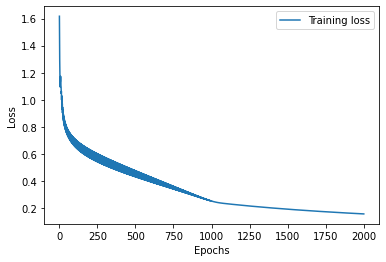

In [183]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5. Test

In [184]:
print(y_pred.argmax(1))

x_test = torch.FloatTensor([[1, 2, 1, 1], [1, 2, 5, 6]])
with torch.no_grad():
  y_pred = model(x_test)  # predicted output

print(y_pred.argmax(1))

tensor([2, 2, 2, 1, 1, 1, 0, 0])
tensor([2, 1])
